___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

2023-11-18 14:56:50.019843: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 0.9981 - accuracy: 0.3594
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.9772 - accuracy: 0.3613
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.9577 - accuracy: 0.3613
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9391 - accuracy: 0.3650
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9214 - accuracy: 0.3687
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.9046 - accuracy: 0.3836
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8891 - accuracy: 0.3985
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8746 - accuracy: 0.4041
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8600 - accuracy: 0.4078
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 0.8462 - accuracy: 0.4171
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.7058
Epoch 85/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7076
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5441 - accuracy: 0.7095
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5429 - accuracy: 0.7076
Epoch 88/200
6/6 [==============================] - 0s 27ms/step - loss: 0.5417 - accuracy: 0.7114
Epoch 89/200
6/6 [==============================] - 0s 9ms/step - loss: 0.5405 - accuracy: 0.7169
Epoch 90/200
6/6 [==============================] - 0s 7ms/step - loss: 0.5393 - accuracy: 0.7151
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5382 - accuracy: 0.7188
Epoch 92/200
6/6 [==============================] - 0s 7ms/step - loss: 0.5370 - accuracy: 0.7225
Epoch 93/200
6/6 [==============================] - 0s 19ms/step - loss: 0.5358 - accuracy: 0.7225
Epoch 94/200
6/6 [=============

6/6 [==============================] - 0s 7ms/step - loss: 0.4816 - accuracy: 0.7691
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4811 - accuracy: 0.7691
Epoch 168/200
6/6 [==============================] - 0s 10ms/step - loss: 0.4807 - accuracy: 0.7672
Epoch 169/200
6/6 [==============================] - 0s 43ms/step - loss: 0.4802 - accuracy: 0.7691
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.7672
Epoch 171/200
6/6 [==============================] - 0s 8ms/step - loss: 0.4793 - accuracy: 0.7672
Epoch 172/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4789 - accuracy: 0.7672
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.7654
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.7654
Epoch 175/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4775 - accuracy: 0.7654
Epoch 176/200
6/6 [==

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

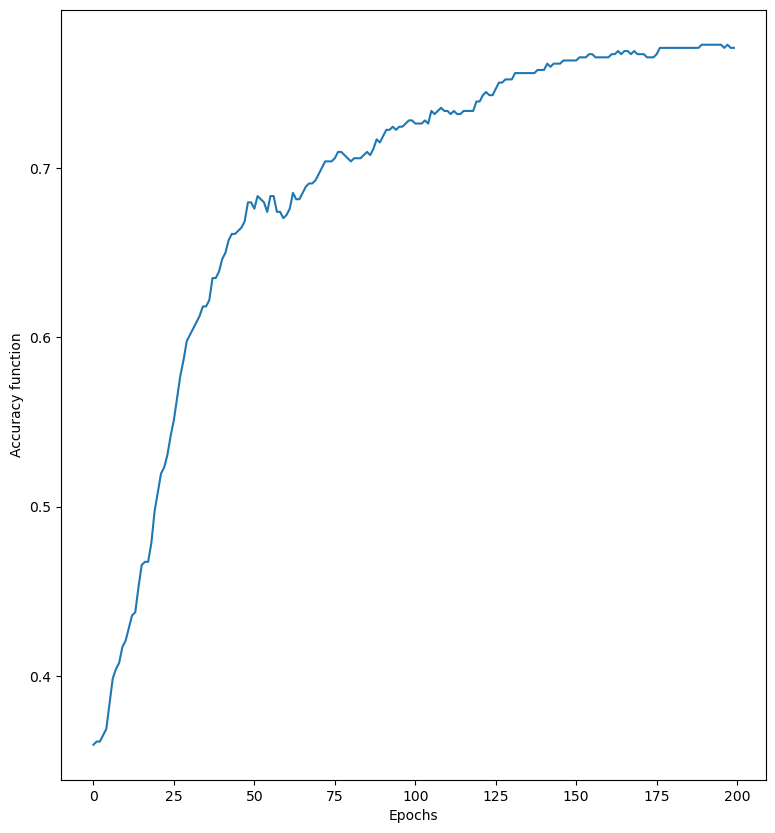

In [10]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [11]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 2ms/step


In [12]:
Y_pred

array([[0.47887242],
       [0.21204112],
       [0.10664942],
       [0.21711369],
       [0.53847367],
       [0.61642164],
       [0.04754427],
       [0.68841016],
       [0.58100444],
       [0.6285286 ],
       [0.33223248],
       [0.76975447],
       [0.4482184 ],
       [0.5223029 ],
       [0.11591361],
       [0.47114313],
       [0.17405894],
       [0.10246103],
       [0.69330347],
       [0.49282596],
       [0.30184647],
       [0.1122817 ],
       [0.5398265 ],
       [0.11609891],
       [0.6006569 ],
       [0.7732525 ],
       [0.15025234],
       [0.06543417],
       [0.25892338],
       [0.19785203],
       [0.8006685 ],
       [0.72802025],
       [0.6356499 ],
       [0.640036  ],
       [0.7164769 ],
       [0.66429883],
       [0.85098493],
       [0.32552937],
       [0.64866173],
       [0.6142226 ],
       [0.08997858],
       [0.6607157 ],
       [0.65748847],
       [0.3983216 ],
       [0.07125599],
       [0.5760553 ],
       [0.68772113],
       [0.228

In [13]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [14]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 2ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.771 	 0.688 	 0.633
  Test 	 0.710 	 0.575 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [15]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [16]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [20]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [21]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [23]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 3s 1s/step - loss: 2.8967 - accuracy: 0.3083 - val_loss: 2.1298 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 141ms/step - loss: 1.8241 - accuracy: 0.3667 - val_loss: 0.9978 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 304ms/step - loss: 0.9907 - accuracy: 0.3750 - val_loss: 1.0969 - val_accuracy: 0.3667
Epoch 4/200
2/2 [==============================] - 0s 229ms/step - loss: 1.0918 - accuracy: 0.3500 - val_loss: 1.0897 - val_accuracy: 0.4000
Epoch 5/200
2/2 [==============================] - 0s 259ms/step - loss: 1.0529 - accuracy: 0.4500 - val_loss: 0.7898 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 190ms/step - loss: 0.7581 - accuracy: 0.6583 - val_loss: 0.6820 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 361ms/step - loss: 0.6884 - accuracy: 0.6333 - val_loss: 0.7257 - val_accuracy: 0.4667
Epoch 8/200
2/2 

Epoch 59/200
2/2 [==============================] - 0s 155ms/step - loss: 0.5478 - accuracy: 0.6917 - val_loss: 0.4266 - val_accuracy: 0.8333
Epoch 60/200
2/2 [==============================] - 0s 107ms/step - loss: 0.3294 - accuracy: 0.8917 - val_loss: 0.2710 - val_accuracy: 0.9667
Epoch 61/200
2/2 [==============================] - 0s 138ms/step - loss: 0.2568 - accuracy: 0.9500 - val_loss: 0.3730 - val_accuracy: 0.8333
Epoch 62/200
2/2 [==============================] - 0s 254ms/step - loss: 0.3365 - accuracy: 0.8667 - val_loss: 0.3480 - val_accuracy: 0.8667
Epoch 63/200
2/2 [==============================] - 0s 202ms/step - loss: 0.2508 - accuracy: 0.9333 - val_loss: 0.3428 - val_accuracy: 0.8667
Epoch 64/200
2/2 [==============================] - 0s 429ms/step - loss: 0.2378 - accuracy: 0.9500 - val_loss: 0.2556 - val_accuracy: 0.9667
Epoch 65/200
2/2 [==============================] - 0s 190ms/step - loss: 0.2255 - accuracy: 0.9750 - val_loss: 0.5032 - val_accuracy: 0.8333
Epoch 

2/2 [==============================] - 0s 112ms/step - loss: 0.1775 - accuracy: 0.9333 - val_loss: 0.3558 - val_accuracy: 0.8333
Epoch 117/200
2/2 [==============================] - 0s 113ms/step - loss: 0.3027 - accuracy: 0.8667 - val_loss: 0.1559 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 107ms/step - loss: 0.1390 - accuracy: 0.9667 - val_loss: 0.3108 - val_accuracy: 0.8667
Epoch 119/200
2/2 [==============================] - 0s 179ms/step - loss: 0.1372 - accuracy: 0.9583 - val_loss: 0.3660 - val_accuracy: 0.8333
Epoch 120/200
2/2 [==============================] - 0s 142ms/step - loss: 0.3345 - accuracy: 0.8500 - val_loss: 0.2735 - val_accuracy: 0.8667
Epoch 121/200
2/2 [==============================] - 0s 138ms/step - loss: 0.2322 - accuracy: 0.9167 - val_loss: 0.7870 - val_accuracy: 0.8000
Epoch 122/200
2/2 [==============================] - 0s 140ms/step - loss: 0.3867 - accuracy: 0.8667 - val_loss: 0.2704 - val_accuracy: 0.8667
Epoch 123/200

2/2 [==============================] - 0s 122ms/step - loss: 0.0992 - accuracy: 0.9833 - val_loss: 0.1925 - val_accuracy: 0.9000
Epoch 174/200
2/2 [==============================] - 0s 221ms/step - loss: 0.1025 - accuracy: 0.9667 - val_loss: 0.1239 - val_accuracy: 0.9667
Epoch 175/200
2/2 [==============================] - 0s 229ms/step - loss: 0.1024 - accuracy: 0.9833 - val_loss: 0.1275 - val_accuracy: 0.9667
Epoch 176/200
2/2 [==============================] - 0s 288ms/step - loss: 0.0961 - accuracy: 0.9833 - val_loss: 0.5342 - val_accuracy: 0.8667
Epoch 177/200
2/2 [==============================] - 0s 301ms/step - loss: 0.1957 - accuracy: 0.9250 - val_loss: 0.5151 - val_accuracy: 0.8000
Epoch 178/200
2/2 [==============================] - 0s 144ms/step - loss: 0.4624 - accuracy: 0.8333 - val_loss: 0.5313 - val_accuracy: 0.8000
Epoch 179/200
2/2 [==============================] - 0s 162ms/step - loss: 0.3982 - accuracy: 0.8333 - val_loss: 0.8192 - val_accuracy: 0.8333
Epoch 180/200

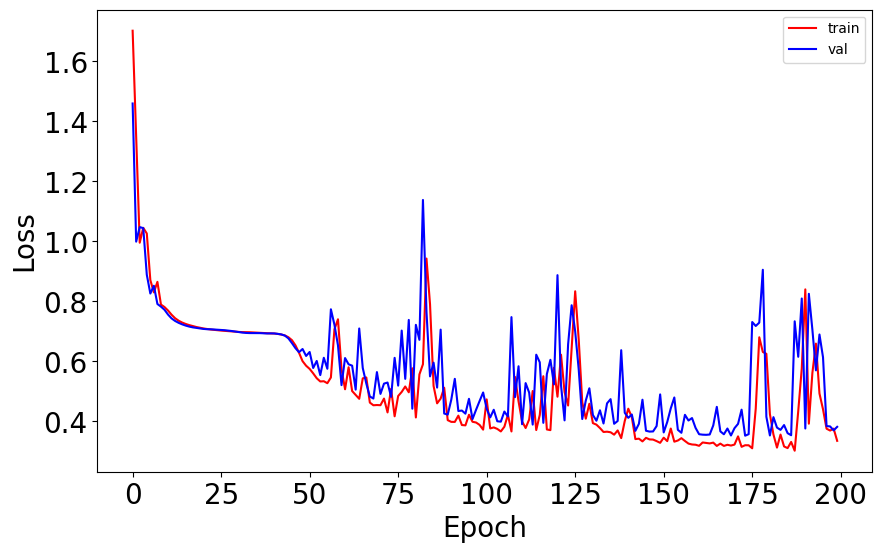

In [24]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [25]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 55ms/step


In [26]:
Y_pred

array([[1.2503554e-02, 9.8160529e-01, 5.8911452e-03],
       [9.9984407e-01, 1.5584781e-04, 4.6405523e-28],
       [2.7817106e-04, 1.3968247e-01, 8.6003929e-01],
       [1.2118262e-02, 9.8127043e-01, 6.6112694e-03],
       [2.0460816e-02, 9.7861707e-01, 9.2212885e-04],
       [9.9949652e-01, 5.0338404e-04, 1.1989666e-25],
       [1.3190559e-01, 8.6809385e-01, 4.9479047e-07],
       [6.7891000e-04, 2.7251562e-01, 7.2680539e-01],
       [1.3973577e-03, 4.5326802e-01, 5.4533458e-01],
       [6.2751919e-02, 9.3723679e-01, 1.1415463e-05],
       [1.4844524e-03, 4.7191513e-01, 5.2660036e-01],
       [9.9852365e-01, 1.4762958e-03, 1.9656028e-23],
       [9.9989015e-01, 1.0981969e-04, 8.8408550e-29],
       [9.9869800e-01, 1.3019850e-03, 1.0833569e-23],
       [9.9974787e-01, 2.5214034e-04, 4.5322921e-27],
       [2.4191316e-02, 9.7532326e-01, 4.8539756e-04],
       [2.7817106e-04, 1.3968247e-01, 8.6003929e-01],
       [3.4482963e-02, 9.6539396e-01, 1.2299225e-04],
       [8.6701829e-03, 9.695

In [27]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

In [28]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [29]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [30]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 67ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.983 	 0.984 	 0.983
  Test 	 0.933 	 0.933 	 0.933
